# Волновое уравнение

Здесь живет решение волнового уравнения с нулевыми граничными условиями на концах отрезка (-L,L). Начальную волну можно сгенерировать в generate_initial. Схема центральная, поэтому нужно аккуратно выбирать параметры сетки. Решение может генерироваться долго, поэтому нужно подождать.

<IPython.core.display.Javascript object>


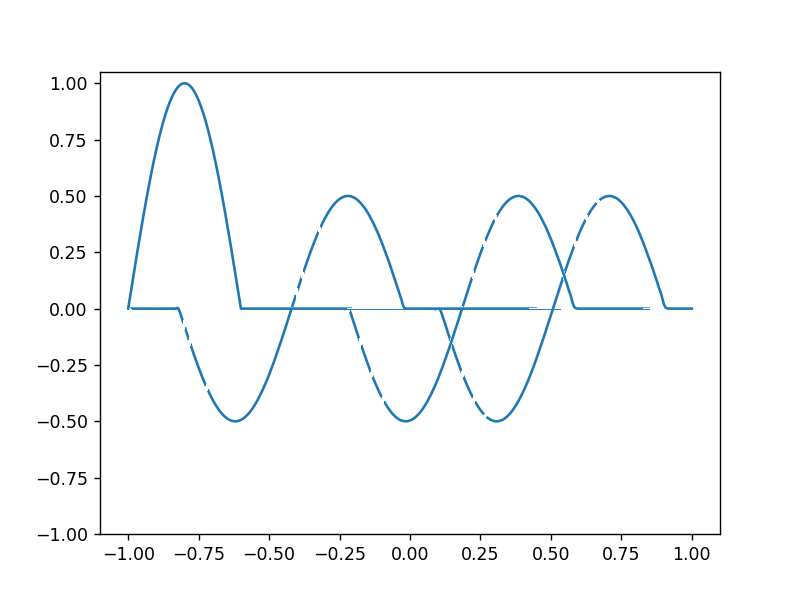

interactive(children=(FloatSlider(value=0.0, description='c', max=10.0, step=0.001), Output()), _dom_classes=(…

In [1]:
!pip install numpy
!pip install matplotlib
import numpy as np
%matplotlib notebook
from ipywidgets import *


L = 1.
c = 0.5



T = 10
Time_gen = 10000
h_t = 1e-4 * T
h_x = 1e-3 * L

scale = ((h_x) / (h_t)) ** 2



x_mesh = np.linspace(-L,L,np.int(2*L/h_x) + 1)

t_mesh = np.linspace(0,T,np.int(T/h_t) + 1)

def generate_initial(x_mesh,t_mesh):
    psi = np.zeros((x_mesh.size+2,t_mesh.size))
    y = np.asarray([np.cos(5*np.pi/2*x) * np.int(x <= (-3 / 5)) for x in x_mesh])
    
    psi[1:x_mesh.size+1,0] = y
    psi[1:x_mesh.size+1,1] = y
    psi[1:x_mesh.size+1,2] = y
    return psi
    
#Находим psi[x,t]

def right_side(psi, kx, kt):
    return (c ** 2 / scale) * (psi[kx+1,kt-1] - 2*psi[kx, kt-1] + psi[kx-1, kt-1]) + 2*psi[kx,kt-1] - psi[kx, kt-2]

def sweep(psi, kt, mesh):
    psi[0, kt] = 0.
    psi[1, kt] = 0.
    
    for i in range(2, mesh.size):
        psi[i, kt] = right_side(psi,i,kt)
       
    return psi

psi = generate_initial(x_mesh, t_mesh)

for i in range(3, Time_gen):
    psi = sweep(psi, i, x_mesh)


import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x_mesh, psi[1:x_mesh.size+1,0])
plt.ylim(np.max(psi[:,0]))
plt.ylim(bottom=-np.max(psi[:,0]))

def update(c = 0.):
    line.set_ydata(psi[1:x_mesh.size+1,np.int(c/h_t)])
    fig.canvas.draw()
    
interact(update, c = widgets.FloatSlider(min=0,max=10,step=h_t,value=0.));


    


А здесь живет неудачная попытка численно решить динамическое уравнение Шрёдингера для квадратичного потенциала (гармонический осциллятор). Начальное состояние - основное, и на сравнительно небольших временных интервалах даже ведет себя, как надо, но потом пускается во все тяжкие. Нужно аккуратно следить за устойчивостью схемы, что мне к моменту наступления дедлайна было лень проделывать, так что, возможно, в другой раз.